In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## Task analysis

(729, 729) (729, 729)


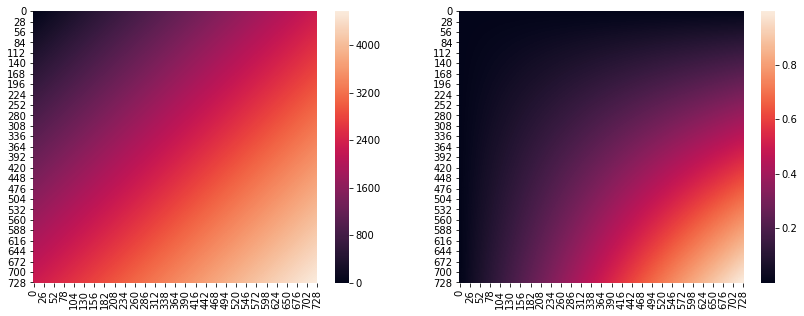

In [3]:
n = 729
b = np.array([[3.142 * (i + j) for j in range(n)] for i in range(n)])

plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.heatmap(b)

b2 = np.array([[(i * j + 1) / (n **2) 
                for j in range(n)] for i in range(n)])

plt.subplot(122)
sns.heatmap(b2)
plt.savefig("./images/initial_matrices.png")
print(b.shape, b2.shape)

In [4]:
########## Loop 1
rN2 = 1.0 / (n*n)  
a = [[0 for j in range(n)] 
            for i in range(n)]
tasks1 = [0 for i in range(n)]


for i in range(n):
    j = n - 1
    tmp = j - i
    z = 0
    while j > i:
        a[i][j] += np.cos(b[i, j])
        j -= 1
    tasks1[i] += tmp
# tasks1 = np.array(tasks1)
a = np.array(a)


########## Loop 2
c = [0 for i in range(n)]
jmax = np.array([1 if (i % (3 * int(i / 30) + 1)) != 0 
                     else n 
                         for i in range(n)])

tasks2 = [0 for i in range(n)]
i = 0
while i < n:
    counter, j = 0, 0
    while j < jmax[i]:
        k = 0
        while k < j:
            c[i] += (k + 1) * np.log(b2[i, j]) * rN2
            k += 1
        j += 1
    tasks2[i] += jmax[i]
    i += 1
# tasks2 = np.array(tasks2)
##########

print(a.sum(), sum(c))
#-34302.14748		-2 524 264.46

-343.0214747657312 -25242.644603198565


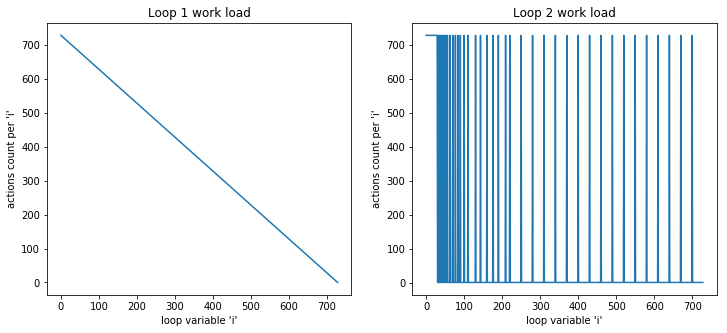

In [5]:


plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(range(n), tasks1)
plt.title("Loop 1 work load")
plt.ylabel("actions count per 'i'")
plt.xlabel("loop variable 'i'")

plt.subplot(122)
plt.plot(range(n), tasks2)
plt.title("Loop 2 work load")
plt.ylabel("actions count per 'i'")
plt.xlabel("loop variable 'i'")

plt.savefig("./images/workload_per_iteration.png")

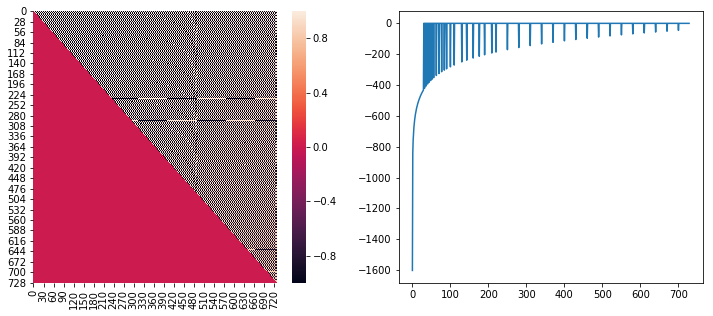

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.heatmap(a)
plt.subplot(122)
plt.plot(c) 

In [178]:
# plt.figure(figsize=(14, 6))
# plt.subplot(121)
# sns.heatmap(b)
# plt.subplot(122)
# sns.heatmap(a)
# plt.savefig("./images/loop1.png")

In [12]:
# plt.figure(figsize=(12,10))
# sns.heatmap(a)

## Schedule-Based Performance Analysis

In [311]:
data = pd.read_excel("report_res.xlsx")
data.columns = [col.strip() for col in data.columns]

In [312]:
data.head()

,threads_num,sched_type,chunk_size,loop1_time,loop2_time,total_time,vaild1,valid2
0,6,static,0,0.060534,0.369956,0.430490,-34302.147477,-2.524264e+06
1,6,auto,0,0.060116,0.361976,0.422093,-34302.147477,-2.524264e+06
2,6,static,1,0.036363,0.238194,0.274557,-34302.147477,-2.524264e+06
3,6,static,2,0.034851,0.172745,0.207596,-34302.147477,-2.524264e+06
4,6,static,4,0.034541,0.114443,0.148984,-34302.147477,-2.524264e+06


In [313]:
data["type"] = data["sched_type"].astype("category").cat.codes
data["sched_type"] = data["sched_type"].apply(lambda x: x.strip())
data

,threads_num,sched_type,chunk_size,loop1_time,loop2_time,total_time,vaild1,valid2,type
0,6,static,0,0.060534,0.369956,0.430490,-34302.147477,-2.524264e+06,4
1,6,auto,0,0.060116,0.361976,0.422093,-34302.147477,-2.524264e+06,1
2,6,static,1,0.036363,0.238194,0.274557,-34302.147477,-2.524264e+06,4
3,6,static,2,0.034851,0.172745,0.207596,-34302.147477,-2.524264e+06,4
4,6,static,4,0.034541,0.114443,0.148984,-34302.147477,-2.524264e+06,4
5,6,static,8,0.035408,0.124659,0.160067,-34302.147477,-2.524264e+06,4
6,6,static,16,0.037241,0.165027,0.202268,-34302.147477,-2.524264e+06,4
7,6,static,32,0.040847,0.279259,0.320106,-34302.147477,-2.524264e+06,4
8,6,static,64,0.048285,0.328253,0.376538,-34302.147477,-2.524264e+06,4
9,6,dynamic,1,0.035636,0.099393,0.135029,-34302.147477,-2.524264e+06,2


In [314]:
dict(zip([col.strip() for col in data.sched_type.unique()], data.type.unique()))

{'affinity': 0, 'auto': 1, 'dynamic': 2, 'guided': 3, 'static': 4}

In [315]:
# six = data[(data.threads_num==6)&(data.chunk_size!=0)&(data.index<23)]
six = data[data.index<23]
six

,threads_num,sched_type,chunk_size,loop1_time,loop2_time,total_time,vaild1,valid2,type
0,6,static,0,0.060534,0.369956,0.430490,-34302.147477,-2.524264e+06,4
1,6,auto,0,0.060116,0.361976,0.422093,-34302.147477,-2.524264e+06,1
2,6,static,1,0.036363,0.238194,0.274557,-34302.147477,-2.524264e+06,4
3,6,static,2,0.034851,0.172745,0.207596,-34302.147477,-2.524264e+06,4
4,6,static,4,0.034541,0.114443,0.148984,-34302.147477,-2.524264e+06,4
5,6,static,8,0.035408,0.124659,0.160067,-34302.147477,-2.524264e+06,4
6,6,static,16,0.037241,0.165027,0.202268,-34302.147477,-2.524264e+06,4
7,6,static,32,0.040847,0.279259,0.320106,-34302.147477,-2.524264e+06,4
8,6,static,64,0.048285,0.328253,0.376538,-34302.147477,-2.524264e+06,4
9,6,dynamic,1,0.035636,0.099393,0.135029,-34302.147477,-2.524264e+06,2


#### Loop 1 Timing

,threads_num,sched_type,chunk_size,loop1_time,loop2_time,total_time,vaild1,valid2,type
19,6,guided,8,0.033027,0.304286,0.337314,-34302.147477,-2.524264e+06,3


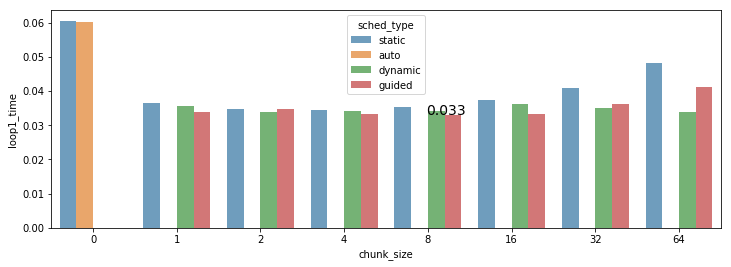

In [318]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x="chunk_size", 
                 y="loop1_time", 
                 hue="sched_type", 
                 data=six, 
                 alpha=0.7)
quickest_time_idx = six.loop1_time.idxmin()
quickest = six[six.index==quickest_time_idx]
quickest_time = quickest.loop1_time.iloc[0]

d = dict(zip([4, 2, 3], [-0.55, -.25, 0]))
shift = d[quickest.type.iloc[0]]

ax.text(np.log(quickest.chunk_size) + 0.7 + shift + 1.2,
        y=quickest_time,
        s=round(quickest_time, 3),
        fontsize=14)
plt.savefig("./images/six_threads_loop1.png")
quickest

#### Loop 2 Timing

,threads_num,sched_type,chunk_size,loop1_time,loop2_time,total_time,vaild1,valid2,type
10,6,dynamic,2,0.033948,0.09886,0.132808,-34302.147477,-2.524264e+06,2


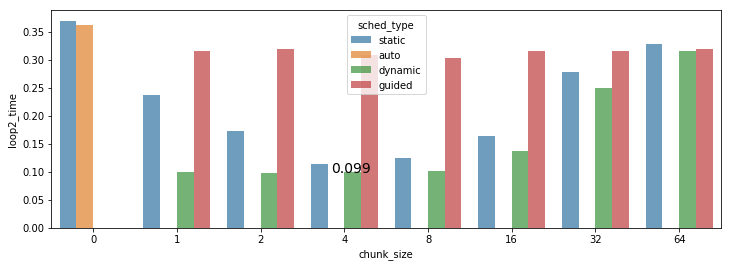

In [322]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x="chunk_size", 
                 y="loop2_time", 
                 hue="sched_type", 
                 data=six, 
                 alpha=0.7)
quickest_time_idx = six.loop2_time.idxmin()
quickest = six[six.index==quickest_time_idx]
quickest_time = quickest.loop2_time.iloc[0]

# {'affinity': 0, 'auto': 1, 'dynamic': 2, 'guided': 3, 'static': 4}

d = dict(zip([4, 2, 3], [-0.55, -.25, 0]))
shift = d[quickest.type.iloc[0]]

ax.text(np.log(quickest.chunk_size) + 1 + shift + 1.4,
        y=quickest_time,
        s=round(quickest_time, 3),
        fontsize=14)
plt.savefig("./images/six_threads_loop2.png")
quickest

### Speed Up (T1/TP)

In [323]:
six[six.sched_type=="static"]

,threads_num,sched_type,chunk_size,loop1_time,loop2_time,total_time,vaild1,valid2,type
0,6,static,0,0.060534,0.369956,0.430490,-34302.147477,-2.524264e+06,4
2,6,static,1,0.036363,0.238194,0.274557,-34302.147477,-2.524264e+06,4
3,6,static,2,0.034851,0.172745,0.207596,-34302.147477,-2.524264e+06,4
4,6,static,4,0.034541,0.114443,0.148984,-34302.147477,-2.524264e+06,4
5,6,static,8,0.035408,0.124659,0.160067,-34302.147477,-2.524264e+06,4
6,6,static,16,0.037241,0.165027,0.202268,-34302.147477,-2.524264e+06,4
7,6,static,32,0.040847,0.279259,0.320106,-34302.147477,-2.524264e+06,4
8,6,static,64,0.048285,0.328253,0.376538,-34302.147477,-2.524264e+06,4


/Users/yeldosbalgabekov/anaconda2/envs/py35/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


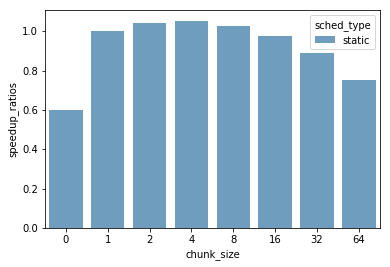

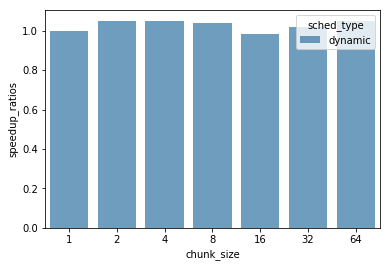

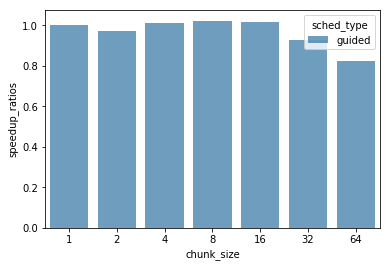

In [324]:
for tp in ["static", "dynamic", "guided"]:
    plt.figure()
    speedup = six[six.sched_type==tp]

    one_thread_time_idx = speedup[speedup.chunk_size==1].index[0]
    one_thread = speedup[speedup.index==one_thread_time_idx]

    one_thread_time = one_thread.loop1_time.iloc[0]

    speedup['speedup_ratios'] = speedup.loop1_time.apply(lambda x: one_thread_time / x)

    ax = sns.barplot(x="chunk_size", 
                     y="speedup_ratios", 
                     hue="sched_type", 
                     data=speedup, 
                     alpha=0.7)
    plt.savefig("./images/speedup_l1_{}.png".format(tp))

/Users/yeldosbalgabekov/anaconda2/envs/py35/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


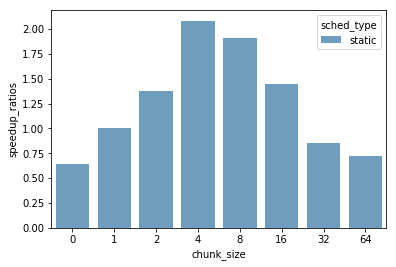

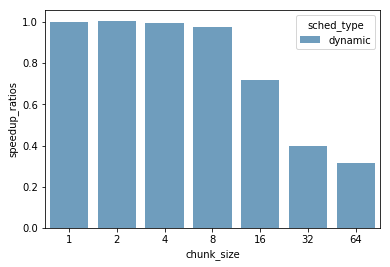

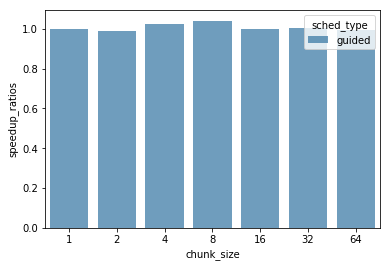

In [325]:
for tp in ["static", "dynamic", "guided"]:
    plt.figure()
    speedup = six[six.sched_type==tp]

    one_thread_time_idx = speedup[speedup.chunk_size==1].index[0]
    one_thread = speedup[speedup.index==one_thread_time_idx]

    one_thread_time = one_thread.loop2_time.iloc[0]

    speedup['speedup_ratios'] = speedup.loop2_time.apply(lambda x: one_thread_time / x)

    ax = sns.barplot(x="chunk_size", 
                     y="speedup_ratios", 
                     hue="sched_type", 
                     data=speedup, 
                     alpha=0.7)
    plt.savefig("./images/speedup_l2_{}.png".format(tp))

### Loop 1, Best on different threads: Guided, 4

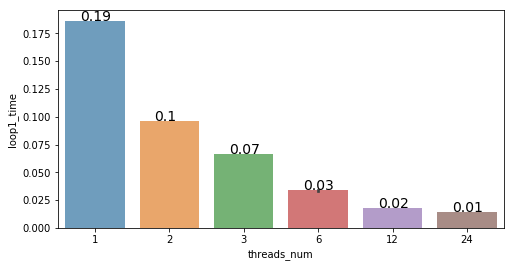

In [331]:
dynamic8 = data[(data.chunk_size==4)&(data.type==3)]
plt.figure(figsize=(8, 4))
ax = sns.barplot(x="threads_num", 
                 y="loop1_time", 
#                  hue="threads_num", 
                 data=dynamic8, 
                 alpha=0.7)

for counter, i in enumerate(dynamic8.index):
    if counter == 0: 
        continue 
    row = dynamic8[dynamic8.index==i]
    ax.text(counter-1.2, 
            y=row.loop1_time.iloc[0], 
            s=round(row.loop1_time.iloc[0], 2),
            fontsize=14)
plt.savefig("./images/best_loop_1.png")

### Loop 2, Best on different threads: Dynamic, 8

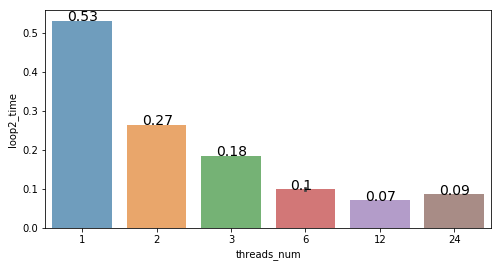

In [334]:
dynamic8 = data[(data.chunk_size==8)&(data.type==2)]
plt.figure(figsize=(8, 4))
ax = sns.barplot(x="threads_num", 
                 y="loop2_time", 
#                  hue="threads_num", 
                 data=dynamic8, 
                 alpha=0.7)

for counter, i in enumerate(dynamic8.index):
    if counter == 0: 
        continue 
    row = dynamic8[dynamic8.index==i]
    ax.text(counter-1.2, 
            y=row.loop2_time.iloc[0], 
            s=round(row.loop2_time.iloc[0], 2),
            fontsize=14)
plt.savefig("./images/best_loop_2.png")

## Affinity scheduling

In [335]:
affinity = data[data.sched_type=="affinity"]
affinity

,threads_num,sched_type,chunk_size,loop1_time,loop2_time,total_time,vaild1,valid2,type
35,1,affinity,0,0.181084,0.520817,0.701901,-34302.147477,-2.524264e+06,0
36,2,affinity,0,0.089496,0.267335,0.356831,-34302.147477,-2.524264e+06,0
37,3,affinity,0,0.061889,0.183215,0.245103,-34302.147477,-2.524264e+06,0
38,6,affinity,0,0.033176,0.100130,0.133307,-34302.147477,-2.524264e+06,0
39,12,affinity,0,0.019062,0.058894,0.077956,-34302.147477,-2.524264e+06,0
40,24,affinity,0,0.029058,0.043776,0.072834,-34302.147477,-2.524264e+06,0


### Loop 1

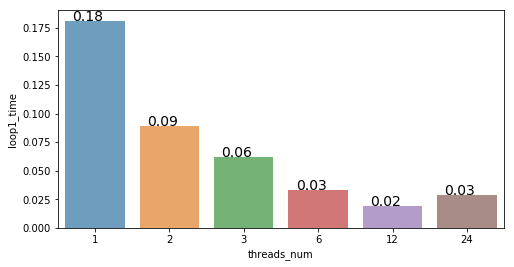

In [336]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x="threads_num", 
                 y="loop1_time", 
#                  hue="threads_num", 
                 data=affinity, 
                 alpha=0.7)

for counter, i in enumerate(affinity.index):
#     if counter == 0: 
#         continue 
    row = affinity[affinity.index==i]
#     print(row)
    ax.text(counter-0.3, 
            y=row.loop1_time.iloc[0], 
            s=round(row.loop1_time.iloc[0], 2),
            fontsize=14)
plt.savefig("./images/affinity_loop_1.png")

### Loop 2

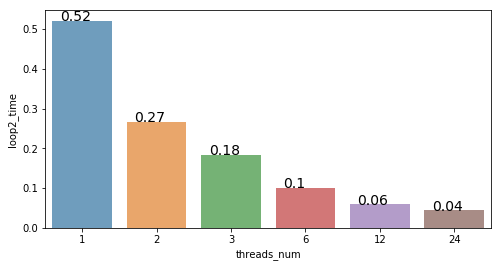

In [337]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x="threads_num", 
                 y="loop2_time", 
#                  hue="threads_num", 
                 data=affinity, 
                 alpha=0.7)

for counter, i in enumerate(affinity.index):
#     if counter == 0: 
#         continue 
    row = affinity[affinity.index==i]
#     print(row)
    ax.text(counter-0.3, 
            y=row.loop2_time.iloc[0], 
            s=round(row.loop2_time.iloc[0], 2),
            fontsize=14)
plt.savefig("./images/affinity_loop_2.png")

In [357]:
print(six.loop1_time.min() / affinity.loop1_time.min(), six.loop1_time.min(), affinity.loop1_time.min())
print(six.loop2_time.min() / affinity.loop2_time.min(), six.loop2_time.min(), affinity.loop2_time.min())

1.7326093799181619 0.033027 0.019062
2.258315058479532 0.09886 0.043776


In [355]:
six.loop2_time.min(), affinity.loop2_time.min()

(0.09886, 0.043776)